<a href="https://colab.research.google.com/github/Aayush360/data_science/blob/master/Chronic_Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: Chronic kidney Disease Prediction using Artificial Neural Network.

In [0]:
#import dependencies
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [5]:
#load the data

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kidney_disease.csv')
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
#get the shape of the data

df.shape

(400, 26)

In [0]:
#create a list of column name to keep

columns_to_retain = ['sg','al','se','hemo','pcv','wc','rc','htn','classification']

#drop all the remaining columns except in columns_to_retain list

df = df.drop( [col for col in df.columns if not col in columns_to_retain], axis=1 )

#drop rows with na or missing values

df = df.dropna(axis=0)

In [0]:
#transform the non-numeric data in the columns

for col in df.columns:
  if df[col].dtype == np.number:
    continue
  df[col] =LabelEncoder().fit_transform(df[col])


In [11]:
#print the first 5 rows of new cleaned dataset

df.head()

,sg,al,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,15.4,26,66,30,1,0
3,1.005,4.0,11.2,14,56,15,1,0
4,1.010,2.0,11.6,17,62,23,0,0
5,1.015,3.0,12.2,21,66,21,1,0
7,1.015,2.0,12.4,26,58,27,0,0


In [0]:
#split the data into independent(X) and dependent dataset(y)

X = df.drop(columns='classification')
y =df['classification']






In [0]:
#feature Scaling
#min-max scaler method is used to scale the data so that all the input data lies between the range of 0 and 1

x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_name = X.columns
X[column_name] = x_scaler.transform(X)

In [0]:
#split the data into 80% training and 20% testing and shuffle

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [29]:
#build the model

model = Sequential()
model.add(Dense(256,input_dim=len(X.columns),kernel_initializer=k.initializers.RandomNormal(seed=13), activation='relu'))
model.add(Dense(1,activation='hard_sigmoid'))

In [30]:
#complile the model
#loss function to know how well the model does in training
#and try to improve it using optimizers

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
#train the model
history = model.fit(X_train,y_train, epochs=2000, batch_size=X_train.shape[0])




Epoch 1/2000





195/195 [==============================] - 1s 3ms/step - loss: 0.7043 - acc: 0.4462
Epoch 2/2000
195/195 [==============================] - 0s 22us/step - loss: 0.6962 - acc: 0.4462
Epoch 3/2000
195/195 [==============================] - 0s 22us/step - loss: 0.6872 - acc: 0.4462
Epoch 4/2000
195/195 [==============================] - 0s 19us/step - loss: 0.6779 - acc: 0.8718
Epoch 5/2000
195/195 [==============================] - 0s 18us/step - loss: 0.6687 - acc: 0.9179
Epoch 6/2000
195/195 [==============================] - 0s 24us/step - loss: 0.6596 - acc: 0.9077
Epoch 7/2000
195/195 [==============================] - 0s 21us/step - loss: 0.6507 - acc: 0.9077
Epoch 8/2000
195/195 [==============================] - 0s 21us/step - loss: 0.6420 - acc: 0.8923
Epoch 9/2000
195/195 [==============================] - 0s 18us/step - loss: 0.6336 - acc: 0.8872
Epoch 10/2000
195/195 [==============================] - 0s 21us/step - loss: 0.6254 - acc: 0.8821
Epoch 11/200

In [0]:
#save the model
model.save('ckd.model')


Text(0.5, 0, 'epoch')

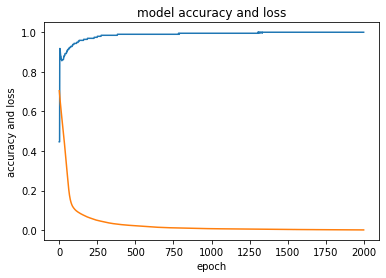

In [37]:
#visulize the model loss and accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [38]:
#print the shape of the train and the test data

print("shape of the test data",X_test.shape)
print("shape of training data", X_train.shape)


shape of the test data (49, 7)
shape of training data (195, 7)


In [42]:
#let us see how well our model does in prediction

pred = model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred] #changes probability into 0 and 1.


print('Original : {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(",".join(str(x) for x in pred)))

Original : 0,1,0,0,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,1
Predicted : 0,1,0,0,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,1


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [46]:
cm =confusion_matrix(y_test,pred)
cm

array([[23,  0],
       [ 0, 26]])

In [48]:
accuracy_score(y_test,pred)

1.0